
# Project: Investigate a Dataset (TMDB Movie Data!)

using python libriaies numpy, pandas, matplotlib and some other libriaies we will go throught this project and try to investigate it's dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
- the TMDb movie data set  contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.let's find other intresting patterns in the dataset.
<br><br>

### Questions:
> 1.  Which movie get the highest Ratings ?
2.  Which movie made the highest revenue and lowest ?
3.  Which Year Has The Highest Profit Rate?
4. Which genres are most popular from year to year? 


In [142]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.
### General Properties

In [145]:
# Loading my data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Read the CSV File Using Pandas read_csv function
TMDb = pd.read_csv('tmdb-movies.csv')   

# print the concise summery of the dataset
TMDb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [146]:
#print out first five movies
TMDb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [147]:
#print out last five movies
TMDb.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [148]:
#since the dataset contain rows that have null values  
TMDb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [149]:
TMDb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

there is some  problems that need to be cleaned.
> ### Data That We will Delete Or Modify
1. remove duplicated rows.
2. Changing release date into datetime format
3. Remove colums that are not used.


**1. Remove Duplicate Rows**
>sum all the rows that are dulicated
>
>then drop all dulicated rows


In [150]:
sum(TMDb.duplicated())

1

In [151]:
TMDb.drop_duplicates(inplace = True)

In [152]:
TMDb.shape

(10865, 21)

**2. Changing release date into datetime format**


In [153]:
TMDb['release_date'] = pd.to_datetime(TMDb['release_date'])
TMDb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove colums that are not used.**

In [154]:
TMDb.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

In [155]:
TMDb.shape

(10865, 15)

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.
### Research Question 1 (Which movie get the highest Ratings ?)

In [156]:
    min_rate = TMDb["vote_average"].idxmin()
    high_rate = TMDb["vote_average"].idxmax()
    low = pd.DataFrame(TMDb.loc[min_rate,:])
    high = pd.DataFrame(TMDb.loc[high_rate,:])

    print("the Highest rate movie is:  ",TMDb['original_title'][high_rate])
    print("Movthe Lowest rate movie is: ",TMDb['original_title'][min_rate])


the Highest rate movie is:   The Story of Film: An Odyssey
Movthe Lowest rate movie is:  Transmorphers


#### top rated 20 movies

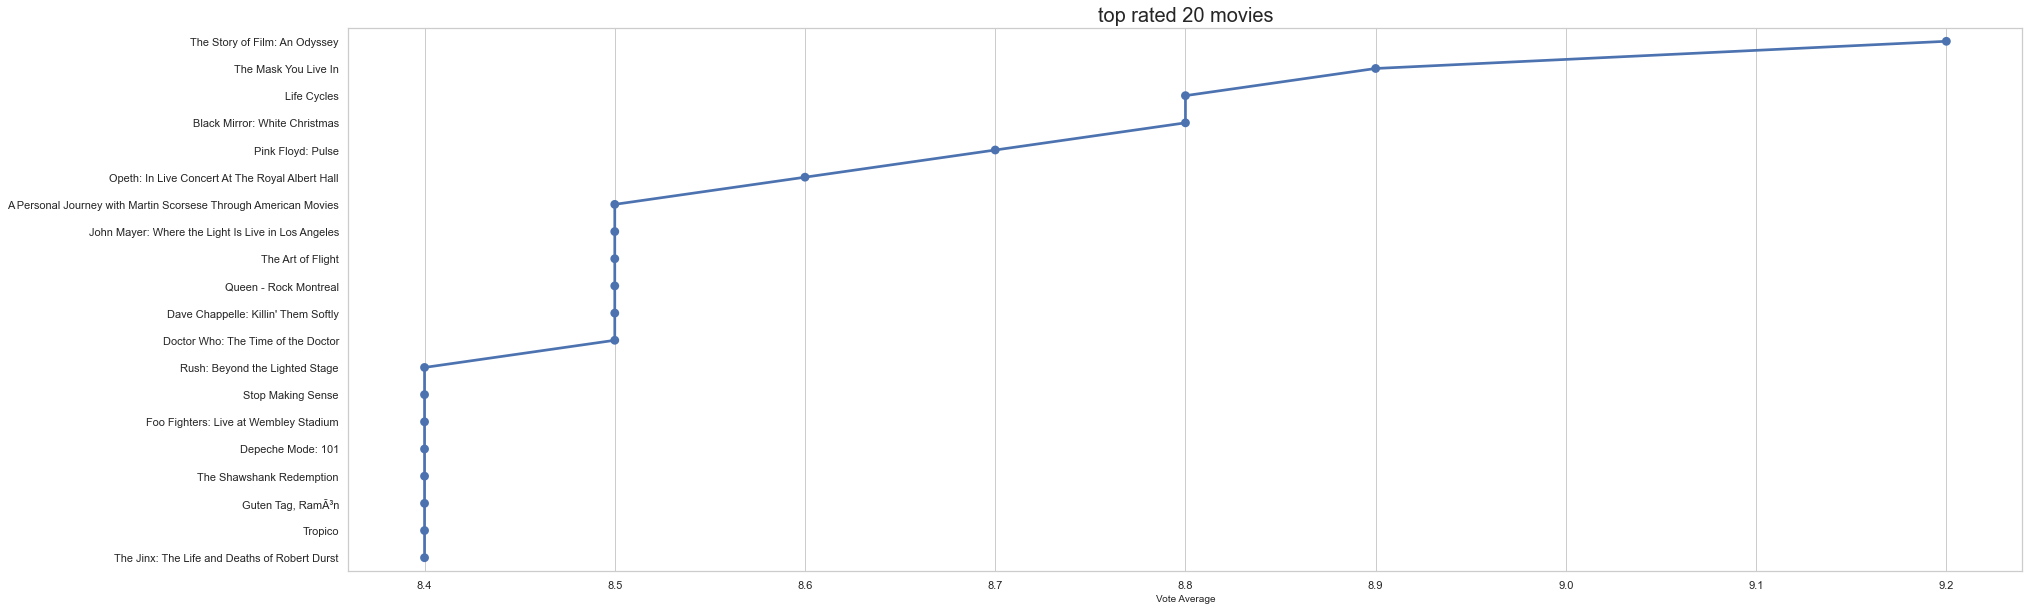

In [157]:
#sort the movies by vote average

info = pd.DataFrame(TMDb['vote_average'].sort_values(ascending = False))
info['original_title'] = TMDb['original_title']
data = list(map(str,(info['original_title'])))

#show the top 20 rated movies .
x = list(data[:20])
y = list(info['vote_average'][:20])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("top rated 20 movies",fontsize = 20)
ax.set_xlabel("Vote Average",fontsize = 10)
sns.set_style("darkgrid")

### Research Question 2  (Which movie made the highest revenue and lowest ?)

In [158]:
    min_rate = TMDb["revenue"].idxmin()
    high_rate = TMDb["revenue"].idxmax()
    low = pd.DataFrame(TMDb.loc[min_rate,:])
    high = pd.DataFrame(TMDb.loc[high_rate,:])

    print("the Highest revenue movie is:  ",TMDb['original_title'][high_rate])
    print("Movthe Lowest revenue movie is: ",TMDb['original_title'][min_rate])


the Highest revenue movie is:   Avatar
Movthe Lowest revenue movie is:  Wild Card


#### top revenue 20 movies

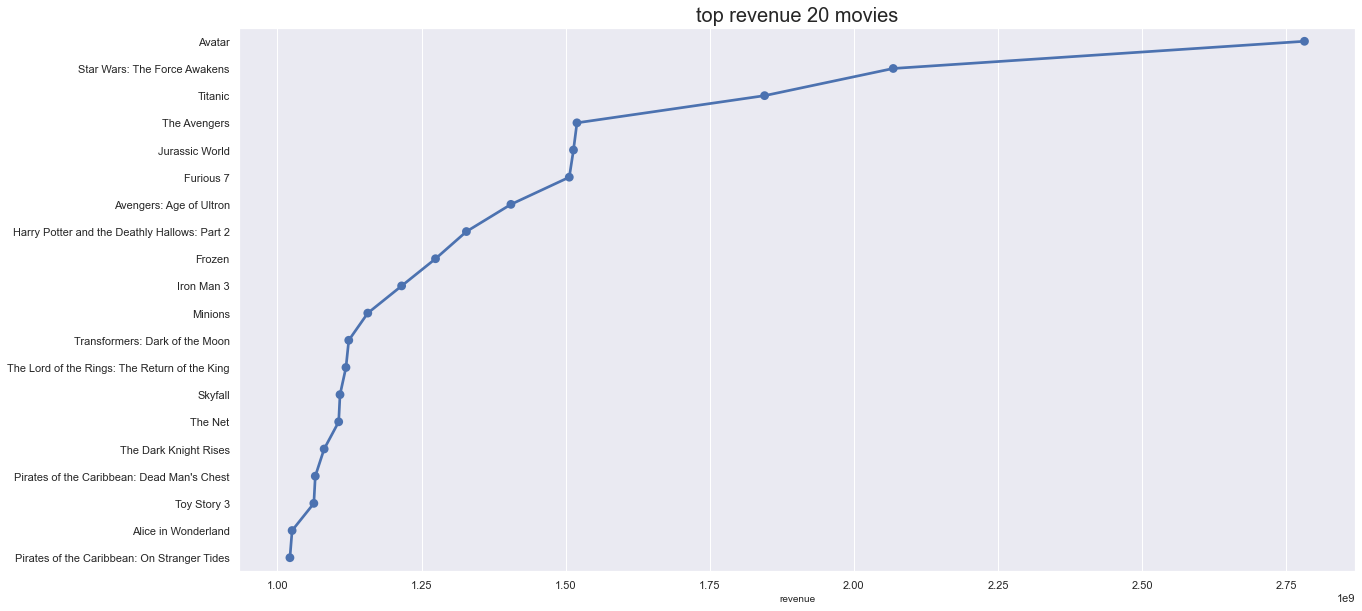

In [159]:
#sort the movies by vote average

info = pd.DataFrame(TMDb['revenue'].sort_values(ascending = False))
info['original_title'] = TMDb['original_title']
data = list(map(str,(info['original_title'])))

#show the top 20 rated movies .
x = list(data[:20])
y = list(info['revenue'][:20])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("top revenue 20 movies",fontsize = 20)
ax.set_xlabel("revenue",fontsize = 10)
sns.set_style("darkgrid")

### Research Question 3  (Which Year Has The Highest Revenue ?)

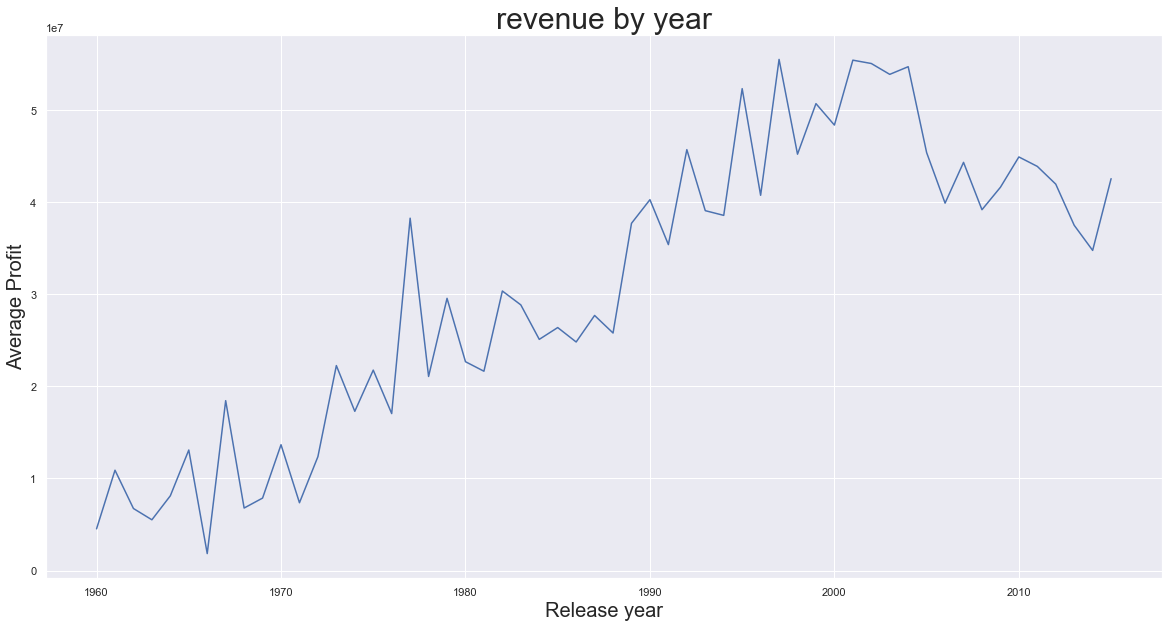

In [160]:
TMDb.groupby('release_year')['revenue'].mean().plot()
#setting up  title and labels of the figure.
plt.title("revenue by year",fontsize = 30)
plt.xlabel('Release year',fontsize = 20)
plt.ylabel('Average Profit',fontsize = 20)

#setup the figure size.
sns.set(rc={'figure.figsize':(30,10)})
sns.set_style("whitegrid")

### Research Question 4   (Which genres are most popular for every year? )

In [175]:
#map all the rows of genres in a list.
genre_details = list(map(str,(TMDb['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(TMDb['release_year'])
popularity = np.array(TMDb['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [176]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.034638,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.104266,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.153510,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.171136,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974311,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


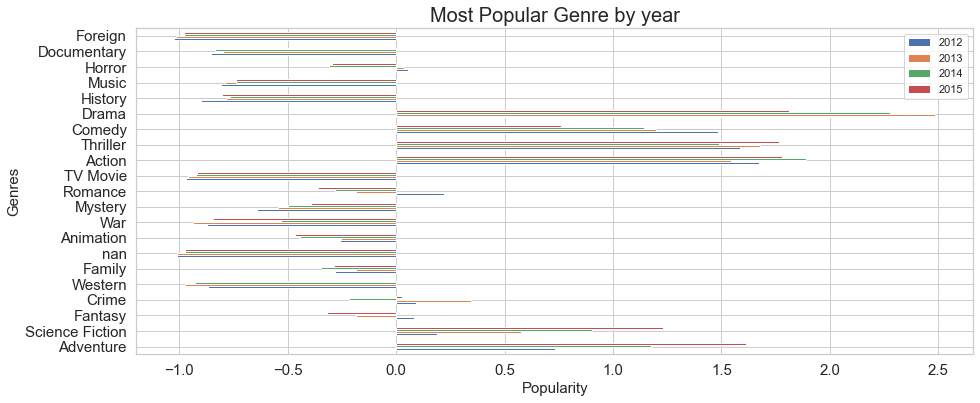

In [181]:
#plot the barh plot of the standardised data.
popular_genre.iloc[:,52:].plot(kind='barh',figsize = (15,6),fontsize=15)

#setup the title and labels of the plot.
plt.title("Most Popular Genre by year",fontsize=20)
plt.xlabel("Popularity",fontsize=15)
plt.ylabel("Genres",fontsize = 15)
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions
- the most popular genre in 2015: drama
- the highest rated movie is:The Story of Film: An Odyssey
- the highest revenue movie is:Avatar
- the higher budgets Movies have shown a higher increase in the revenues.



>**Limitations** 
- the results can only be treated as indicators and are not generalizable
- splitting the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
- this Data shows us that we have high probability of making high profits if we had similar characteristics as such.but there are many that have to be taken care of.
